# Анализ объявлений о продаже квартир: исследовательский анализ данных

## Описание проекта:

В данном проекте исследуется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель проекта заключается в том, чтобы провести первичный исследовательский анализ и выявить существующие закономерности и особенности в данных. Результаты исследования могут быть использованы для дальнейшего определения цен на недвижимость, а также могут помочь в создании автоматизированной системы отслеживания аномалий и мошенничества на площадке объявлений. Данные для анализа частично предоставлены пользователями, а частично - обогащены за счет картографических данных.

## Главные выводы:

* Связь между стоимостью и общей площадью квартиры можно охарактеризовать, как положительную и наиболее сильную из рассмотренных факторов.
* Связь между стоимостью и количеством комнат также положительна, однако она значительно слабее, чем связь между стоимостью и общей площадью.
* Связь между стоимостью и удаленностью от центра умеренная и отрицательная. Чем дальше квартира находится от центра населенного пункта, тем она дешевле.
* Квартиры на первом этаже в среднем стоят дешевле квартир на последнем этаже. Дороже всего в среднем оцениваются квартиры, не находящиеся ни на первом, ни на последнем этаже.
* В выходные дни размещается примерно в два раза меньше объявлений, чем в будние дни. 
* В апреле публикуются объявления с наивысшей ценой, а в июне - с наименьшей. Также небольшое увеличение цены наблюдается в ноябре. 
* В мае публикуют наименьшее количество объявлений в году, а в феврале - наибольшее. В декабре и январе количество размещенных объявлений также значительно ниже, чем в другие месяцы, но несколько выше, чем в мае.
* Популярность сервиса по размещению объявлений быстро росла на протяжении 2014-2018 гг. и достигла пика в 2018 году. В 2019, произошел резкий спад количества объявлений почти в 3 раза. 
* Из топ-10 рассмотренных населенных пунктов по количеству размещенных объявлений, самым дорогим является Санкт-Петербург (105527.93 руб. / 1 кв.м.).
* Самые доступные квартиры - в Выборге (57738.77 руб / 1 кв.м.) - это почти в 2 раза дешевле, чем в Санкт-Петербурге.
* Условная граница центра Санкт-Петербурга проходит в радиусе 8 километров включительно.
* Цены в целом по Санкт-Петербургу за исследуемый период увеличились значительно сильнее, чем в центре города.

## Содержание проекта:<a name="introduction"></a>

#### 1. [Обзор данных](#paragraph1)

#### 2. [Предобработка данных](#paragraph2)

* 2.1 [Поиск дубликатов](#subparagraph2_1)
* 2.2 [Работа с пропусками](#subparagraph2_2)
* 2.3 [Приведение данных к верным типам](#subparagraph2_3)
* 2.4 [Расчет дополнительных показателей](#subparagraph2_4)

#### 3. [Исследовательский анализ данных](#paragraph3)

* 3.1 [Распределение общей площади](#subparagraph3_1)
* 3.2 [Распределение цен, указанных в объявлении](#subparagraph3_2)
* 3.3 [Распределение количества комнат](#subparagraph3_3)
* 3.4 [Распределение высоты потолка](#subparagraph3_4)
* 3.5 [Распределение времени, требуемого для продажи квартиры](#subparagraph3_5)
* 3.6 [Очистка данных от выбросов на основании межквартильного размаха (IQR)](#subparagraph3_6)
* 3.7 [Связь стоимости квартиры с различными показателями](#subparagraph3_7)
* 3.8 [Топ-10 населенных пунктов с наибольшим числом объявлений](#subparagraph3_8)
* 3.9 [Выделение сегмента квартир, находящихся в Санкт-Петербурге](#subparagraph3_9)
* 3.10 [Анализ квартир в центре Санкт-Петербурга](#subparagraph3_10)
* 3.11 [Влияние различных факторов на стоимость недвижимости в центре Санкт-Петербурга и по городу в целом](#subparagraph3_11)

#### 4. [Общий вывод](#paragraph4)

## 1. Обзор данных<a name="paragraph1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator

In [2]:
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(), '\n')

total_images 
 10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64 

last_price 
 4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64 

total_area 
 45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64 

first_day_exposition 
 2018-02-01T00:00:00    368
2017-11-10

**Вывод:** В датафрейме 23699 строк и 22 столбца. Несуществующие значения были найдены в 14 столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Не во всех столбцах тип данных был определен корректно.

[Вернуться к оглавлению](#introduction)

## 2. Предобработка данных<a name="paragraph2"></a>

### 2.1 Поиск дубликатов<a name="subparagraph2_1"></a>

In [7]:
data.duplicated().sum()

0

**Вывод:** Дубликаты не были найдены.

### 2.2 Работа с пропусками<a name="subparagraph2_2"></a>

Рассмотрим какую долю составляют несуществующие значения в различных столбцах.

In [8]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

Больше всего пропущенных значений в столбце с апартаментами (88.3%). Поскольку данный тип недвижимости не является доминирующим на рынке, будем считать, что если значение пропущено, то, скорее всего, данная недвижимость не является апартаментами. Заполним пропуски в этом столбце на False.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Также предположим, что если число балконов не указано, значит они отсутствуют. Следовательно, заменим пропуски в `balcony` на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0)

Для высоты потолка, пропущенные значения составляют 38.8%, при этом самым часто встречающимся значением является 2.5 м. Так как высота потолка не характеризуется значительной вариативностью, для дальнейшего анализа будем считать, что данная мода, скорее всего, была пропущена в большинстве строк с несуществующими значениями. С учетом этого допущения, заполним пропуски модальным значением и сохраним в отдельный столбец `ceiling_height_nonull`.

In [11]:
data['ceiling_height_nonull'] = data['ceiling_height'].fillna(data['ceiling_height'].mode()[0])

В остальных случаях, заполнение столбцов приведет к существенному искажению свойств распределения, поэтому было решено на данном этапе не заполнять и не исключать их.

Некоторые пропущенные значения (как, например, в столбце `is_apartment`, `ceiling_height` или `balcony`) могли быть естественным образом не указаны в объявлении, а в других столбцах на это могли повлиять ошибки в алгоритмах сбора или экспорта данных.  

### 2.3 Приведение данных к верным типам<a name="subparagraph2_3"></a>

Для корректной работы с датами требуется перевести данные в формат datetime.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [13]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_nonull
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.50
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2.50
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2.50
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.03


Время размещения объявления было приведено к формату datetime. Столбцы, определившиеся как float, оставим без изменений (они содержат несуществующие значения).

### 2.4 Расчет дополнительных показателей<a name="subparagraph2_4"></a>

Добавим столбец с рассчитанными значениями стоимости 1 кв.м: `sq_price`.

In [14]:
data['sq_price'] = data['last_price'] / data['total_area']

Добавим столбцы, которые показывают, в какой день недели, месяц и год было размещено объявление: `day_start`, `month_start`, `year_start`.

In [15]:
data['day_start'] = data['first_day_exposition'].dt.weekday
data['month_start'] = data['first_day_exposition'].dt.month
data['year_start'] = data['first_day_exposition'].dt.year

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_nonull,sq_price,day_start,month_start,year_start
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,2.70,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,2.50,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,2.50,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,2.50,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,3.03,100000.000000,1,6,2018


Проведем категоризацию квартир на 3 типа в зависимости от этажа: первый, последний, другой.

In [17]:
def floor_categorize(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total'] and row['floors_total'] != 1:
        return 'последний'
    else:
        return 'другой'

In [18]:
data['floor_category'] = data.apply(floor_categorize, axis=1)

In [19]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_nonull,sq_price,day_start,month_start,year_start,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,2.70,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,2.50,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,2.50,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,2.50,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,3.03,100000.000000,1,6,2018,другой


Добавим столбец с соотношением жилой площади к общей: `living_to_total`.

In [20]:
data['living_to_total'] = data['living_area'] / data['total_area']

Добавим столбец с соотношением площади кухни к общей площади: `kitchen_to_total`.

In [21]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

[Вернуться к оглавлению](#introduction)

## 3. Исследовательский анализ данных<a name="paragraph3"></a>

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_nonull,sq_price,day_start,month_start,year_start,living_to_total,kitchen_to_total
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,18181.000000,9110.000000,20518.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,...,0.770255,517.980900,180.888634,2.666160,9.942166e+04,2.569307,6.400101,2017.367146,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,...,0.938346,277.720643,219.727988,0.995355,5.030680e+04,1.789082,3.491561,1.039771,0.105368,0.072968
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,13.000000,1.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,294.000000,45.000000,2.500000,7.658547e+04,1.000000,3.000000,2017.000000,0.495177,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,1.000000,502.000000,95.000000,2.500000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,729.000000,232.000000,2.700000,1.142563e+05,4.000000,10.000000,2018.000000,0.637880,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,1344.000000,1580.000000,100.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### 3.1 Распределение общей площади<a name="subparagraph3_1"></a>

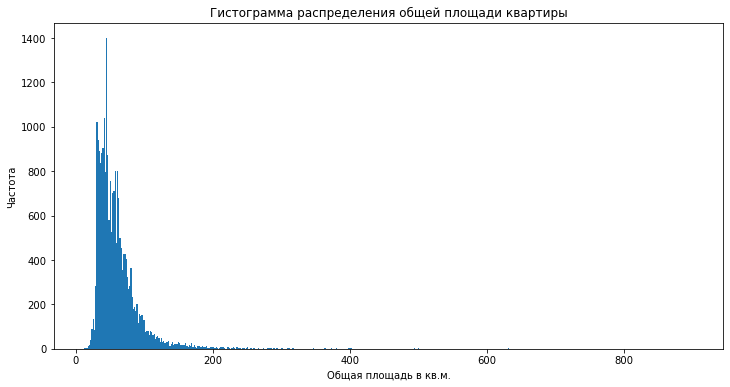

In [23]:
data['total_area'].hist(bins=500, grid=False)
plt.title('Гистограмма распределения общей площади квартиры')
plt.ylabel('Частота')
plt.xlabel('Общая площадь в кв.м.')
plt.show()

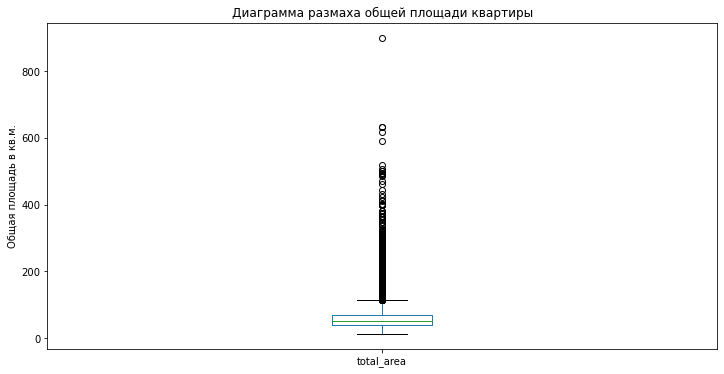

In [24]:
data.boxplot('total_area', grid=False)
plt.title('Диаграмма размаха общей площади квартиры')
plt.ylabel('Общая площадь в кв.м.')
plt.show()

Распределение общей площади квартир напоминает нормальное, при этом на гистограмме и на боксплоте видно значительное количество выбросов в правом хвосте. Из-за выбросов среднее значение смещено вправо относительно медианы.
* *Среднее значение*: **60.35 кв.м**, 
* *Медианное значение*: **52 кв.м**. 
* *Минимум*: **12 кв.м.** (возможно, продавалась комната в общежитии), 
* *Максимум*: **900 кв.м.** (скорее всего, элитная недвижимость). 

### 3.2 Распределение цен, указанных в объявлении<a name="subparagraph3_2"></a>

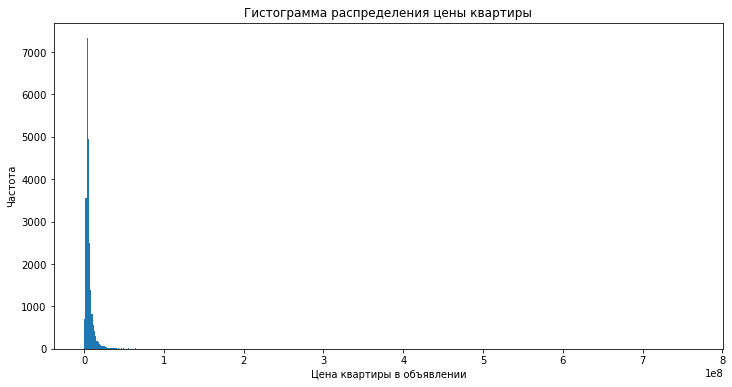

In [25]:
data['last_price'].hist(bins=500, grid=False)
plt.title('Гистограмма распределения цены квартиры')
plt.ylabel('Частота')
plt.xlabel('Цена квартиры в объявлении')
plt.show()

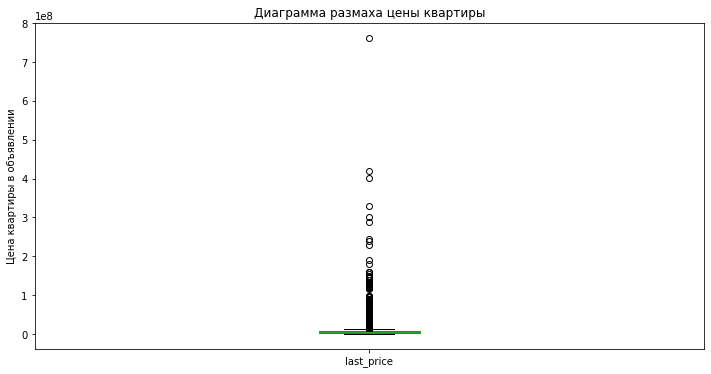

In [26]:
data.boxplot('last_price', grid=False)
plt.title('Диаграмма размаха цены квартиры')
plt.ylabel('Цена квартиры в объявлении')
plt.show()

Распределение цены квартир не похоже на нормальное, имеет существенное количество выбросов. Среднее значение значительно превышает медиану. 
* *Среднее значение*: **6,541,549 руб.** 
* *Медианное значение*: **4,650,000 руб.** 
* *Минимум*: **12,190 руб.** (значение выглядит аномально низким), 
* *Максимум*: **763,000,000 руб.** (аномально высокое значение может соответствовать редкому объекту недвижимости элитного сегмента). 

### 3.3 Распределение количества комнат<a name="subparagraph3_3"></a>

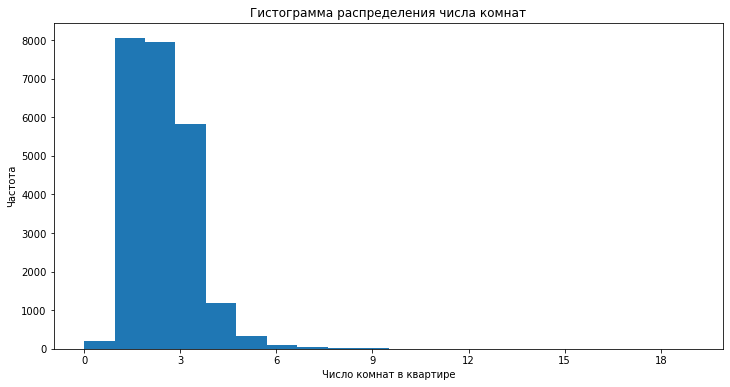

In [27]:
data['rooms'].hist(bins=20, grid=False).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Гистограмма распределения числа комнат')
plt.ylabel('Частота')
plt.xlabel('Число комнат в квартире')
plt.show()

In [28]:
data['rooms'].value_counts(normalize=True)

1     0.339550
2     0.335035
3     0.245327
4     0.049791
5     0.013756
0     0.008313
6     0.004431
7     0.002490
8     0.000506
9     0.000338
10    0.000127
14    0.000084
11    0.000084
19    0.000042
12    0.000042
16    0.000042
15    0.000042
Name: rooms, dtype: float64

Согласно таблице выше, квартиры с большим количеством комнат реже фигурируют в объявлениях. Владельцы таких редких объектов недвижимости предположительно используют не объявления, нацеленные на широкую аудиторию, а иные каналы. Кроме того, специфичность и высокая стоимость такой недвижимости делает ее менее ликвидной. 

Больше всего было объявлений о продаже 1-комнатных (**~33.96%**), 2-комнатных (**~33.5%**) и 3-комнатных (**~24.53%**) квартир. В совокупности эти три категории составляют почти **92%** от всех размещенных объявлений. 

* *Среднее значение*: ~ **2 комнаты**. 
* *Медианное значение:* **2 комнаты**. 
* *Минимум* равен **0**. Можно предположить, что так были заполнены пропущенные значения. Данные строки составляют 0.8% датасета, а значит их исключение из анализа не будет иметь существенного эффекта. 
* *Максимальное значение*: **19 комнат** (аномально высокое).

Далее исключим строки с 0 комнат.

In [29]:
data = data[data['rooms'] >=1]

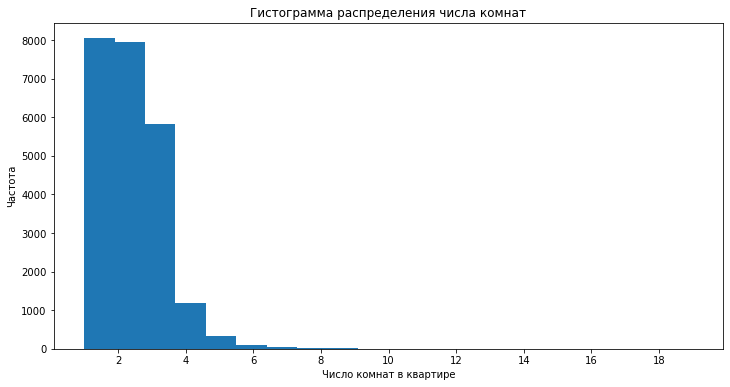

In [30]:
data['rooms'].hist(bins=20, grid=False).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Гистограмма распределения числа комнат')
plt.ylabel('Частота')
plt.xlabel('Число комнат в квартире')
plt.show()

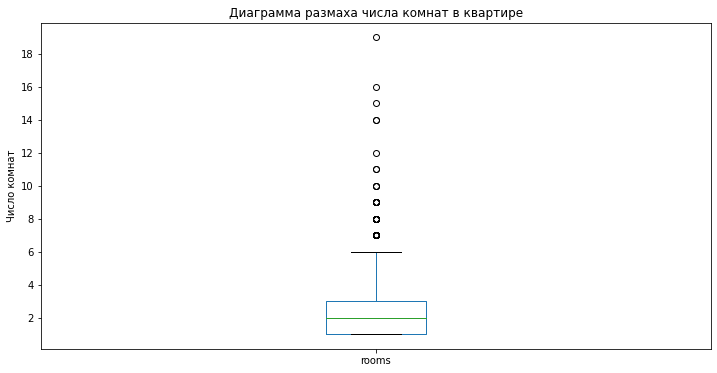

In [31]:
data.boxplot('rooms', grid=False).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Диаграмма размаха числа комнат в квартире')
plt.ylabel('Число комнат')
plt.show()

### 3.4 Распределение высоты потолка<a name="subparagraph3_4"></a>

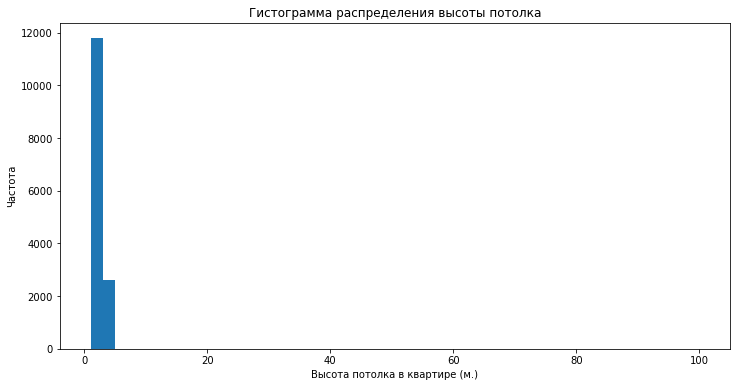

In [32]:
data['ceiling_height'].hist(bins=50, grid=False)
plt.title('Гистограмма распределения высоты потолка')
plt.ylabel('Частота')
plt.xlabel('Высота потолка в квартире (м.)')
plt.show()

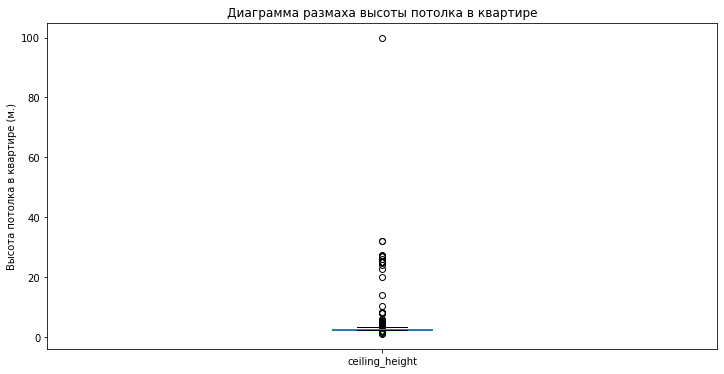

In [33]:
data.boxplot('ceiling_height', grid=False)
plt.title('Диаграмма размаха высоты потолка в квартире')
plt.ylabel('Высота потолка в квартире (м.)')
plt.show()

* *Среднее значение высоты потолка:* **2.77 м**. 
* *Медиана:* **2.65 м**. 
* *Минимум:* **1 м** (аномально низкое значение). 
* *Максимум:* **100 м** (неправдоподобно высокое значение). 

Напомним, что в столбце крайне много пропущенных значений. В отдельном столбце `ceiling_height_nonull`, они были заполнены модой (2.50 м), самым часто встречающимся значением, и в данном случае со значительным отрывом.

### 3.5 Распределение времени, требуемого для продажи квартиры<a name="subparagraph3_5"></a>

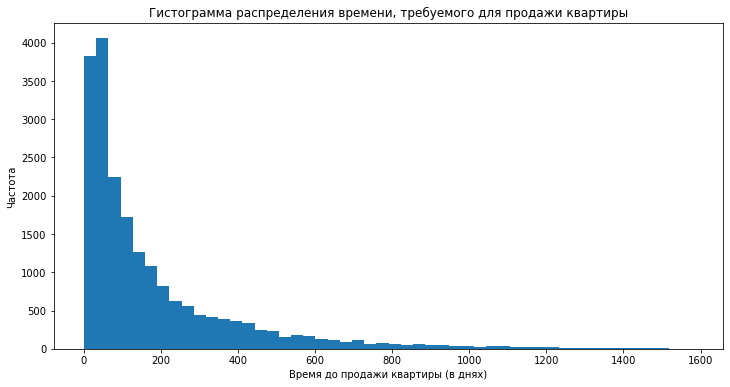

In [34]:
data['days_exposition'].hist(bins=50, grid=False)
plt.title('Гистограмма распределения времени, требуемого для продажи квартиры')
plt.ylabel('Частота')
plt.xlabel('Время до продажи квартиры (в днях)')
plt.show()

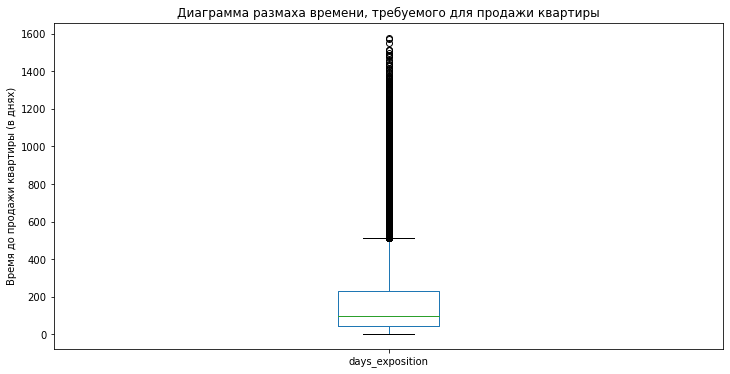

In [35]:
data.boxplot('days_exposition', grid=False)
plt.title('Диаграмма размаха времени, требуемого для продажи квартиры')
plt.ylabel('Время до продажи квартиры (в днях)')
plt.show()

In [36]:
data['days_exposition'].describe()

count    20335.000000
mean       181.533956
std        220.096252
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Распределение объявлений по сроку с момента размещения до снятия похоже на распределение Пуассона. С увеличением срока с момента размещения снижается вероятность не продать объект недвижимости. Также наблюдаются выбросы, которые искажают среднее значение. 

* *Cредний срок размещения объявления:* **181.5 день**
* *Медианный срок размещения:* **96 дней** (почти в два раза короче среднего). 
* *Минимальный срок:* **1 день** (это может означать как мгновенную продажу, так и снятие объявление по различным причинам). 
* *Максимальный срок продажи:* **1580 дней** или более 4 лет (это крайне нетипичное значение, которое искажает свойства выборки. Такие объявления могут отражать непривлекательность  выставленной недвижимости либо говорить о неадекватности предлагаемой цены).

### 3.6 Очистка данных от выбросов на основании межквартильного размаха (IQR)<a name="subparagraph3_6"></a>

In [37]:
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data_filt = data.loc[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))),]
    return data_filt

In [38]:
good_data = remove_outliers(data,'last_price')
good_data = remove_outliers(good_data,'total_area')
good_data = remove_outliers(good_data,'rooms')
good_data = remove_outliers(good_data,'ceiling_height')
good_data = remove_outliers(good_data,'days_exposition')

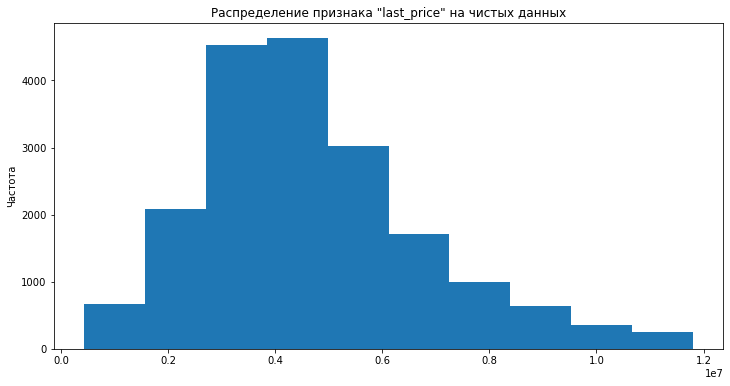

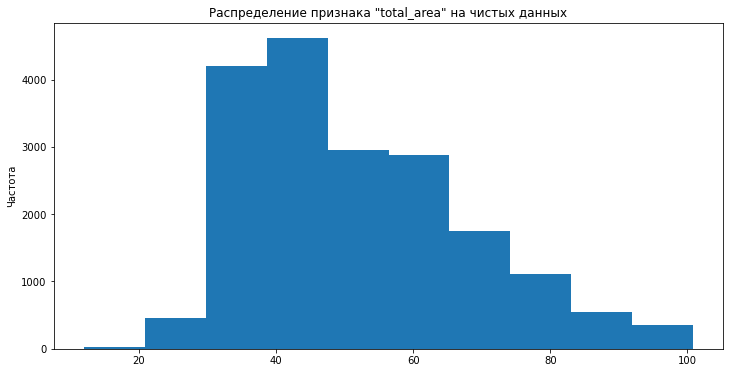

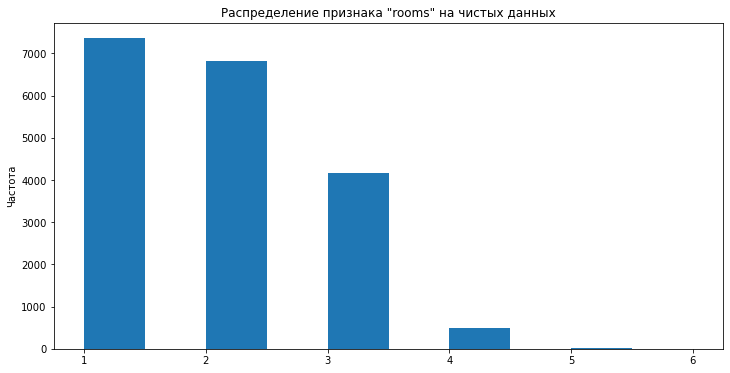

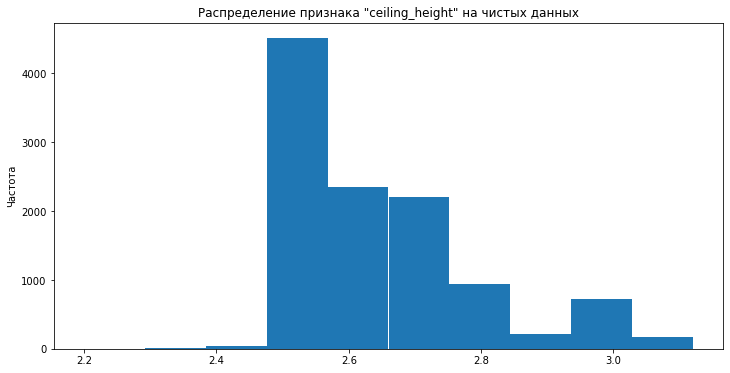

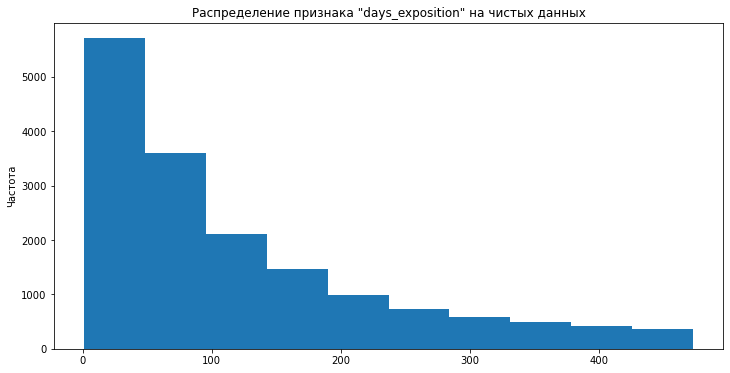

In [39]:
for i in good_data[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']]:
    good_data.hist(i, grid=False)
    plt.title(f'Распределение признака "{i}" на чистых данных')
    plt.ylabel('Частота')

**Вывод:** Устранение выбросов существенно улучшило качество данных. Очищенные данные были сохранены в датафрейме `good_data`.

### 3.7 Связь стоимости квартиры с различными показателями<a name="subparagraph3_7"></a>

* **Связь между стоимостью и общей площадью**

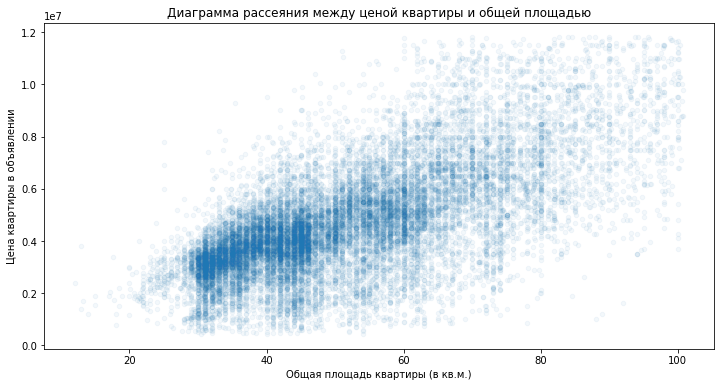

In [40]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05)
plt.title('Диаграмма рассеяния между ценой квартиры и общей площадью')
plt.ylabel('Цена квартиры в объявлении')
plt.xlabel('Общая площадь квартиры (в кв.м.)')
plt.show()

In [41]:
good_data['last_price'].corr(good_data['total_area'])

0.6686642060969359

*Связь между стоимостью и общей площадью квартиры* можно охарактеризовать, как положительную и умеренно сильную. Коэффициент корреляции Пирсона равен **0.669**. Иными словами, большие по размеру квартиры стоят дороже, что довольно логично.

* **Связь между стоимостью квартиры и количеством комнат**

In [42]:
good_data['last_price'].corr(good_data['rooms'])

0.3949869657331374

Связь между стоимостью и количеством комнат также положительна, однако она значительно слабее, чем связь между стоимостью и общей площадью (коэффициент корреляции **0.395**). Это косвенно говорит о том, что покупатели больше обращают внимание на общую жилплощадь, а не на количество комнат. Ведь комнат может быть больше, но при этом эта квартира может уступать по общей площади квартирам с меньшим количеством комнат.

* **Связь между стоимостью и удаленностью от центра**

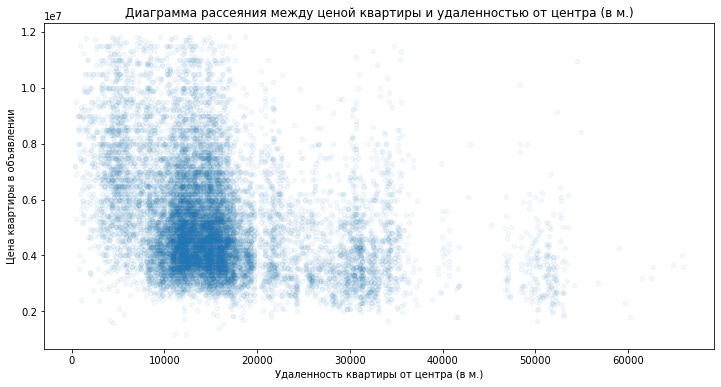

In [43]:
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05)
plt.title('Диаграмма рассеяния между ценой квартиры и удаленностью от центра (в м.)')
plt.ylabel('Цена квартиры в объявлении')
plt.xlabel('Удаленность квартиры от центра (в м.)')
plt.show()

In [44]:
good_data['cityCenters_nearest'].corr(good_data['last_price'])

-0.3154055607896009

Связь между стоимостью и удаленностью от центра умеренная и отрицательная (коэффициент корреляции **-0.315**). То есть, чем дальше квартира находится от центра населенного пункта, тем она дешевле (чем ближе к центру - тем дороже). 

* **Связь между стоимостью квартиры и этажом, на котором она находится**

In [45]:
good_data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median', 'count']).reset_index()

,floor_category,mean,median,count
,,last_price,last_price,last_price
0,другой,4.887215e+06,4500000.0,13937
1,первый,3.960545e+06,3700000.0,2400
2,последний,4.230319e+06,3900000.0,2534


Квартиры на первом этаже в среднем стоят дешевле квартир на последнем этаже (**3,960,545 руб.** против **4,230,319 руб.**). Дороже всего в среднем оцениваются квартиры, не находящиеся ни на первом, ни на последнем этаже (**4,887,215 руб.**). Сравнение медианных значений дает аналогичный результат.

Из этого можно сделать следующие выводы: *первый этаж* является наименее популярным среди покупателей - это связано с многочисленными неудобствами (близость к подвалу, шум с улицы, повышенный риск взлома, отсутствие балкона); *последний этаж* более востребован чем первый, однако и он тоже не лишен недостатков (близость к крыше - в некоторых домах они могут быть обветшалыми, в случае поломки лифта утомительно добираться до квартиры, повышенный риск в случае землетрясений); квартиры *ни на первом, ни на последнем этаже* во многом лишены вышеперечисленных проблем, а следовательно, пользуются наибольшей популярностью и в среднем имеют самую высокую стоимость.

* **Связь между стоимостью квартиры и датой размещения объявления**

In [46]:
day_pivot_filtered = good_data.pivot_table(index='day_start', values='last_price', aggfunc=['mean', 'count']).reset_index()
day_pivot_filtered['day_start'] = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
day_pivot_unfiltered = data.pivot_table(index='day_start', values='last_price', aggfunc=['mean', 'count']).reset_index()
day_pivot_unfiltered['day_start'] = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
day_pivot = pd.concat([day_pivot_filtered, day_pivot_unfiltered], axis=1, keys=['day_pivot_filtered', 'day_pivot_unfiltered'])
day_pivot

day_pivot_filtered                          day_pivot_unfiltered  \
           day_start          mean      count            day_start   
                        last_price last_price                        
0        Понедельник  4.688666e+06       2882          Понедельник   
1            Вторник  4.720203e+06       3322              Вторник   
2              Среда  4.688331e+06       3135                Среда   
3            Четверг  4.688634e+06       3343              Четверг   
4            Пятница  4.679763e+06       3218              Пятница   
5            Суббота  4.573085e+06       1571              Суббота   
6        Воскресенье  4.663564e+06       1400          Воскресенье   

                            
           mean      count  
     last_price last_price  
0  6.533852e+06       3591  
1  6.424564e+06       4148  
2  6.654426e+06       3944  
3  6.723187e+06       4257  
4  6.414309e+06       3950  
5  7.002825e+06       1924  
6  6.269467e+06       1688

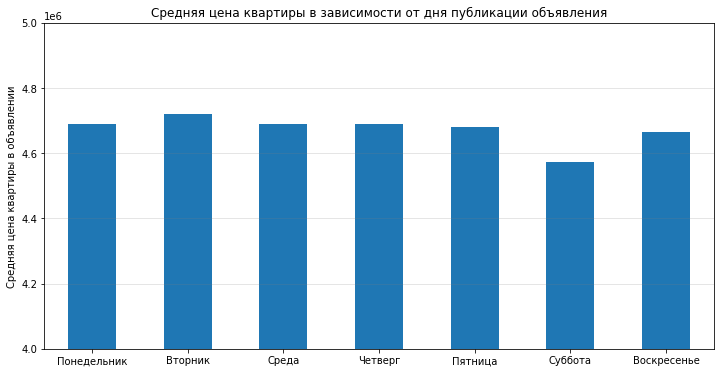

In [47]:
day_pivot.plot(y=[('day_pivot_filtered', 'mean', 'last_price')], 
               kind='bar', title='Средняя цена квартиры в зависимости от дня публикации объявления',
               ylim=(4000000, 5000000), legend=False, rot='0').grid(color='grey', axis='y', alpha=0.25)
plt.xticks(np.arange(0,7), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.ylabel('Средняя цена квартиры в объявлении')
plt.show()

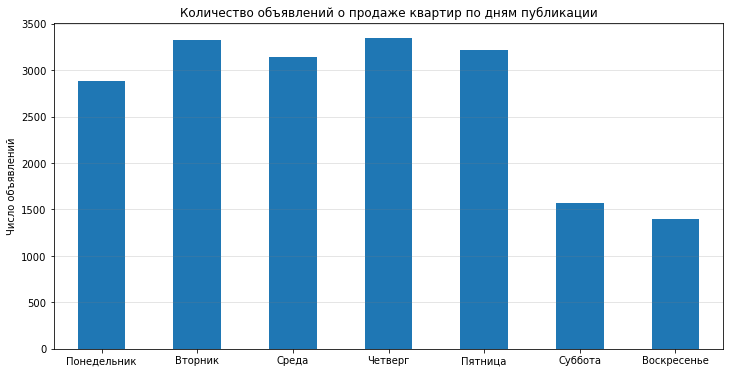

In [48]:
day_pivot.plot(y=[('day_pivot_filtered', 'count', 'last_price')], 
               kind='bar', legend=False, rot='0').grid(color='grey', axis='y', alpha=0.25)
plt.title('Количество объявлений о продаже квартир по дням публикации')
plt.xticks(np.arange(0,7), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.ylabel('Число объявлений')
plt.show()

В зависимости от дня размещения объявления, средняя цена квартиры меняется не значительно, однако *во вторник были размещены объявления про относительно более дорогие квартиры, а в субботу - про более дешевые*. 

Намного более явно прослеживается зависимость количества объявлений от дня недели: *в выходные дни количество размещений примерно в два раза ниже, чем в будние дни*. Это может говорить о том, что люди предпочитают проводить выходные дни с удовольствием, не думая о важных делах. А в рабочие дни, люди гораздо больше склонны планировать серьезные сделки. Данные выводы сохраняют актуальность и на чистых данных без выбросов, и на неотфильтрованном датасете.

In [49]:
month_pivot_filtered = good_data.pivot_table(index='month_start', values='last_price', aggfunc=['mean','median','count']).reset_index()
month_pivot_unfiltered = data.pivot_table(index='month_start', values='last_price', aggfunc=['mean','median','count']).reset_index()
month_pivot = pd.concat([month_pivot_filtered, month_pivot_unfiltered], axis=1, keys=['month_pivot_filtered', 'month_pivot_unfiltered'])
month_pivot

month_pivot_filtered                                      \
            month_start          mean     median      count   
                           last_price last_price last_price   
0                     1  4.693208e+06  4310000.0       1200   
1                     2  4.697223e+06  4300000.0       2144   
2                     3  4.656983e+06  4310000.0       2027   
3                     4  4.792603e+06  4500000.0       1939   
4                     5  4.656415e+06  4280000.0        971   
5                     6  4.488801e+06  4100000.0       1390   
6                     7  4.648439e+06  4250000.0       1331   
7                     8  4.694325e+06  4300000.0       1403   
8                     9  4.709159e+06  4300000.0       1566   
9                    10  4.656739e+06  4300000.0       1750   
10                   11  4.715940e+06  4390000.0       1884   
11                   12  4.707827e+06  4300000.0       1266   

   month_pivot_unfiltered                                      
              month_start          mean     median      count  
                             last_price last_price last_price  
0                       1  6.702762e+06  4600000.0       1488  
1                       2  6.492735e+06  4650000.0       2622  
2                       3  6.383526e+06  4697500.0       2570  
3                       4  6.756476e+06  4800000.0       2365  
4                       5  6.621212e+06  4550000.0       1266  
5                       6  6.318300e+06  4400000.0       1756  
6                       7  6.638658e+06  4677500.0       1678  
7                       8  6.393823e+06  4600000.0       1723  
8                       9  6.876050e+06  4700000.0       1957  
9                      10  6.259981e+06  4600000.0       2111  
10                     11  6.502933e+06  4700000.0       2340  
11                     12  7.051979e+06  4700000.0       1626

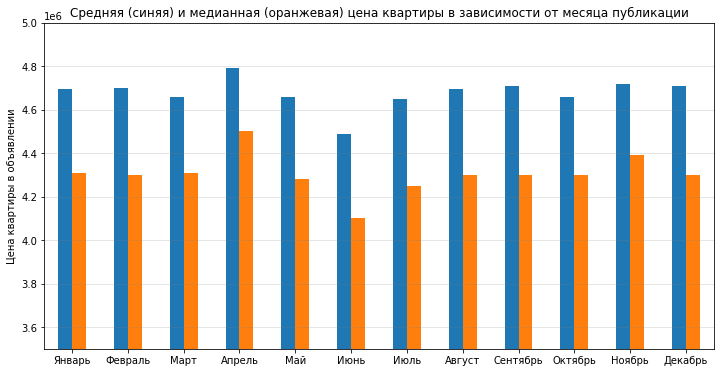

In [50]:
month_pivot.plot(y=[('month_pivot_filtered', 'mean', 'last_price'),('month_pivot_filtered', 'median', 'last_price')], 
               kind='bar', ylim=(3500000, 5000000), legend=False, rot='0').grid(color='grey', axis='y', alpha=0.25)
plt.title('Средняя (синяя) и медианная (оранжевая) цена квартиры в зависимости от месяца публикации')
plt.ylabel('Цена квартиры в объявлении')
plt.xticks(np.arange(0,12), ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.show()

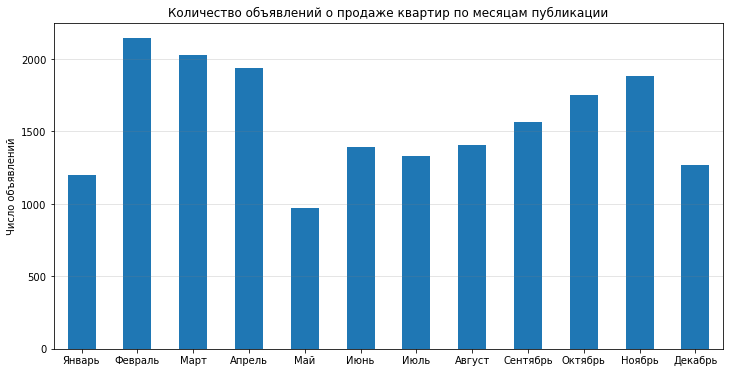

In [51]:
month_pivot.plot(y=[('month_pivot_filtered', 'count', 'last_price')],
               kind='bar', legend=False, rot='0').grid(color='grey', axis='y', alpha=0.25)
plt.title('Количество объявлений о продаже квартир по месяцам публикации')
plt.xticks(np.arange(0,12), ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.ylabel('Число объявлений')
plt.show()

Влияние месяца публикации на цену нельзя назвать однозначной, однако стоит отметить, что *в апреле публикуются объявления с наивысшей ценой, а в июне - с наименьшей. Также небольшое увеличение цены наблюдается в ноябре*. Можно предположить, что в июне владельцы квартир стремятся продать их как можно быстрее, чтобы успеть завершить сделку и получить возможность уехать в летний отпуск. Для этого они могут делать некоторый дисконт к рыночным ценам.

Интересно, что *в мае публикуют наименьшее количество объявлений в году, а в феврале - больше всего. В декабре и январе количество размещенных объявлений также значительно ниже, чем в другие месяцы, но несколько выше, чем в мае*. Возможно это связано с майскими и новогодними праздниками - люди не хотят заниматься сделками с недвижимостью в период праздников.

In [52]:
year_pivot_filtered = good_data.pivot_table(index='year_start', values='last_price', aggfunc=['mean','median','count']).reset_index()
year_pivot_unfiltered = data.pivot_table(index='year_start', values='last_price', aggfunc=['mean','median','count']).reset_index()
year_pivot = pd.concat([year_pivot_filtered, year_pivot_unfiltered], axis=1, keys=['year_pivot_filtered', 'year_pivot_unfiltered'])
year_pivot

year_pivot_filtered                                      \
           year_start          mean     median      count   
                         last_price last_price last_price   
0                2014  6.491429e+06  7500000.0          7   
1                2015  4.716203e+06  4324500.0        386   
2                2016  4.587671e+06  4200000.0       1819   
3                2017  4.609737e+06  4200000.0       6698   
4                2018  4.658586e+06  4300000.0       7488   
5                2019  5.001083e+06  4730000.0       2473   

  year_pivot_unfiltered                                      
             year_start          mean     median      count  
                           last_price last_price last_price  
0                  2014  1.208714e+07  7700000.0        137  
1                  2015  8.588430e+06  5350000.0       1188  
2                  2016  6.834080e+06  4550000.0       2779  
3                  2017  6.628314e+06  4500000.0       8091  
4                  2018  5.970041e+06  4600000.0       8445  
5                  2019  6.804000e+06  5100000.0       2862

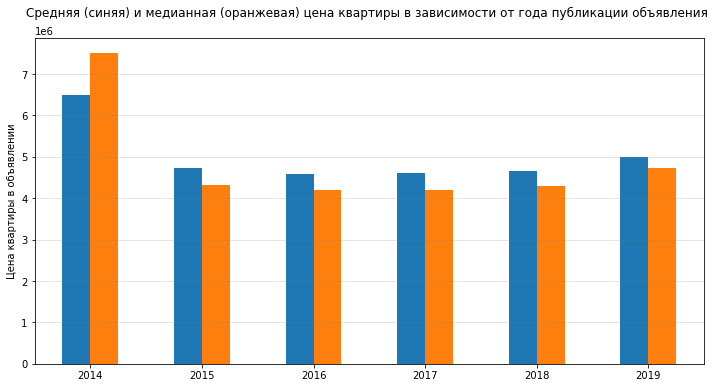

In [53]:
year_pivot.plot(y=[('year_pivot_filtered', 'mean', 'last_price'),('year_pivot_filtered', 'median', 'last_price')], 
               kind='bar', legend=False, rot='0').grid(color='grey', axis='y', alpha=0.25)
plt.title('Средняя (синяя) и медианная (оранжевая) цена квартиры в зависимости от года публикации объявления \n')
plt.xticks(np.arange(0,6), ['2014', '2015', '2016', '2017', '2018', '2019'])
plt.ylabel('Цена квартиры в объявлении')
plt.show()

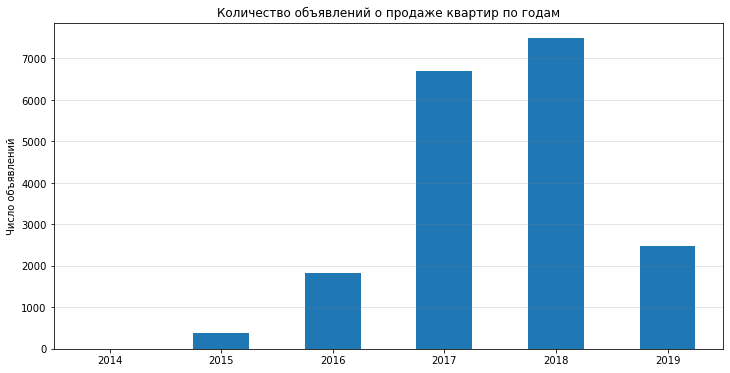

In [54]:
year_pivot.plot(y=[('year_pivot_filtered', 'count', 'last_price')],
               kind='bar', legend=False, rot='0').grid(color='grey', axis='y', alpha=0.25)
plt.title('Количество объявлений о продаже квартир по годам')
plt.xticks(np.arange(0,6), ['2014', '2015', '2016', '2017', '2018', '2019'])
plt.ylabel('Число объявлений')
plt.show()

Зависимость цены квартиры от года размещения объявления действительно присутствует. *В 2014-2015 году произошло резкое снижение средних и медианных цен.* Данный факт можно считать логичным следствием экономического кризиса в России именно в тот период. Люди стремились реализовать свои активы максимально быстро, и тогда же покупательная способность населения существенно снизилась - к тому же недвижимость выглядела крайне непривлекательно на фоне резкой девальвации рубля (валютный кризис). *С 2016 года рынок недвижимости начал медленно, но устойчиво восстанавливаться. Средние цены стабильно росли вплоть до 2019 года по имеющимся чистым данным. По неотфильтрованным данным восстановление можно отсчитывать только с 2017-2018 гг.*

При всем вышесказанном, следует отметить, что на 2014 год данных объективно недостаточно, чтобы делать обоснованное сравнение с другими периодами. Можно с большой долей уверенности предположить, что средние и медианные значения полученные по выборке за 2014 г. не являются репрезентативными.

*Популярность сервиса по размещению объявлений быстро росла на протяжении 2014-2018 гг. и достигла пика в 2018 году. В 2019, произошел резкий спад количества объявлений почти в 3 раза.* Причины могут быть серьезными, требуется более детальное рассмотрение данного вопроса.

### 3.8 Топ-10 населенных пунктов с наибольшим числом объявлений<a name="subparagraph3_8"></a>

In [55]:
popular_10 = good_data.groupby('locality_name')['sq_price'].agg(['count', 'mean']).sort_values(by='count',ascending=False).head(10)
popular_10

,count,mean
locality_name,,
Санкт-Петербург,11821,105527.931708
посёлок Мурино,458,85322.532590
посёлок Шушары,403,78358.597498
Всеволожск,349,67066.385549
Колпино,308,75326.424672
посёлок Парголово,302,90203.031748
Пушкин,298,100056.078437
Гатчина,272,68759.484128
деревня Кудрово,248,92291.318699


Из топ-10 населенных пунктов по количеству размещенных объявлений *самым дорогим является Санкт-Петербург* **(105527.93 руб. / 1 кв.м.)**. 

*Самые доступные квартиры - в Выборге* **(57738.77 руб / 1 кв.м.)**, почти в 2 раза дешевле, чем в Санкт-Петербурге.

### 3.9 Выделение сегмента квартир, находящихся в Санкт-Петербурге<a name="subparagraph3_9"></a>

Подготовим столбец с округленным значением километров до центра города: `km`.

In [56]:
good_data['km'] = good_data['cityCenters_nearest'].div(1000).round(0)

Сделаем срез квартир, которые располагаются в Санкт-Петербурге и сохраним в датафрейме `spb`.

In [57]:
spb = good_data.query('locality_name == "Санкт-Петербург"')

In [58]:
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_height_nonull,sq_price,day_start,month_start,year_start,floor_category,living_to_total,kitchen_to_total,km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,3.03,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,2.50,110544.692737,3,4,2019,другой,NaN,0.263966,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,289.0,2.50,88524.590164,6,2,2017,другой,0.714754,0.106557,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,137.0,2.67,127525.252525,3,11,2017,другой,0.512626,0.214646,14.0
15,16,4650000.0,39.0,2017-11-18,1,NaN,14.0,20.5,5,False,...,19.0,2.50,119230.769231,5,11,2017,другой,0.525641,0.194872,14.0


Далее проведем агрегирование по средним ценам для каждого километра:

In [59]:
spb_pivot = spb.groupby('km')['last_price'].agg(['mean', 'count']).reset_index()

In [60]:
spb_pivot

,km,mean,count
0,0.0,6.650000e+06,4
1,1.0,7.590170e+06,53
2,2.0,7.623440e+06,91
3,3.0,7.162404e+06,141
4,4.0,7.117459e+06,271
5,5.0,7.306352e+06,362
6,6.0,6.860803e+06,317
7,7.0,6.540986e+06,240
8,8.0,6.437550e+06,373
9,9.0,5.413643e+06,447


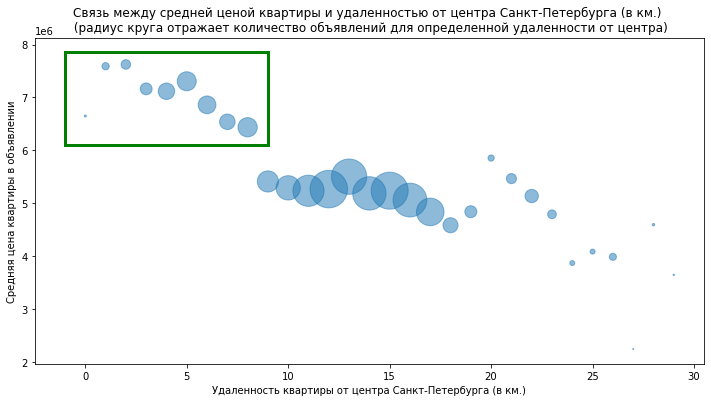

In [61]:
plt.scatter(x=spb_pivot['km'], y=spb_pivot['mean'], s=spb_pivot['count'], alpha=0.5)
plt.gca().add_patch(Rectangle((-1,6100000),10,1750000,linewidth=3,edgecolor='g',facecolor='None'))
plt.title('Связь между средней ценой квартиры и удаленностью от центра Санкт-Петербурга (в км.) \n (радиус круга отражает количество объявлений для определенной удаленности от центра)')
plt.ylabel('Средняя цена квартиры в объявлении')
plt.xlabel('Удаленность квартиры от центра Санкт-Петербурга (в км.)')
plt.show()

In [62]:
print(spb_pivot['km'].corr(spb_pivot['mean']))
print(spb['km'].corr(spb['last_price']))

-0.8894096235248963
-0.2983745425218458


Было установлено, что *граница центра проходит в радиусе* **8 километров** *включительно* (зеленая область на графике). После 8 км. наблюдается некоторый "провал" цены и далее по мере удаления от центра средние цены становятся существенно ниже.

*Корреляция между расстоянием до центра и средними ценами на каждом километре отрицательная и сильная* (**-0.889**). Отрицательная умеренная связь также была выявлена, в целом, между расстоянием до центра Санкт-Петербурга и стоимостью квартиры (**-0.298**). Иными словами, чем дальше от центра города - тем дешевле квартиры.

### 3.10 Анализ квартир в центре Санкт-Петербурга<a name="subparagraph3_10"></a>

На основании нашего вывода о том, что граница центра Санкт-Петербурга проходит в радиусе 8 км, сделаем срез данных по соответствующему условию и сохраним в датафрейме `spb_center`.

In [63]:
spb_center = spb.query('km <= 8')

In [64]:
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,ceiling_height_nonull,sq_price,day_start,month_start,year_start,living_to_total,kitchen_to_total,km
count,1852.000000,1.852000e+03,1852.000000,1852.000000,1041.000000,1850.000000,1715.000000,1852.000000,1681.000000,1852.000000,...,1312.000000,1640.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1715.000000,1681.000000,1852.000000
mean,9.617171,6.939611e+06,59.724968,2.118251,2.809741,7.964865,34.453178,4.429266,10.574587,0.336393,...,488.993902,127.067683,2.674104,119636.265415,2.610151,6.479482,2017.421166,0.569405,0.185599,5.463283
std,5.591321,2.143721e+06,18.539984,0.862542,0.198843,4.634080,13.733221,3.311305,4.558558,0.728158,...,261.009239,114.942677,0.214109,29044.848166,1.747813,3.444412,0.924921,0.110131,0.077778,1.922106
min,0.000000,1.600000e+06,12.000000,1.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,22.000000,3.000000,2.400000,17391.304348,0.000000,1.000000,2015.000000,0.038462,0.060606,0.000000
25%,6.000000,5.300000e+06,45.000000,1.000000,2.650000,5.000000,22.500000,2.000000,7.800000,0.000000,...,266.750000,37.750000,2.500000,98637.444784,1.000000,3.000000,2017.000000,0.504838,0.131148,4.000000
50%,9.000000,6.781381e+06,58.700000,2.000000,2.800000,6.000000,33.000000,4.000000,9.500000,0.000000,...,471.000000,89.000000,2.500000,115590.277778,3.000000,6.000000,2017.000000,0.583851,0.166387,6.000000
75%,13.000000,8.500000e+06,73.000000,3.000000,3.000000,10.000000,44.150000,5.000000,12.200000,0.000000,...,686.500000,184.250000,2.850000,136324.087745,4.000000,10.000000,2018.000000,0.648660,0.221951,7.000000
max,32.000000,1.180000e+07,100.800000,5.000000,3.120000,28.000000,76.000000,23.000000,41.000000,5.000000,...,1199.000000,473.000000,3.120000,292307.692308,6.000000,12.000000,2019.000000,0.931034,0.612648,8.000000


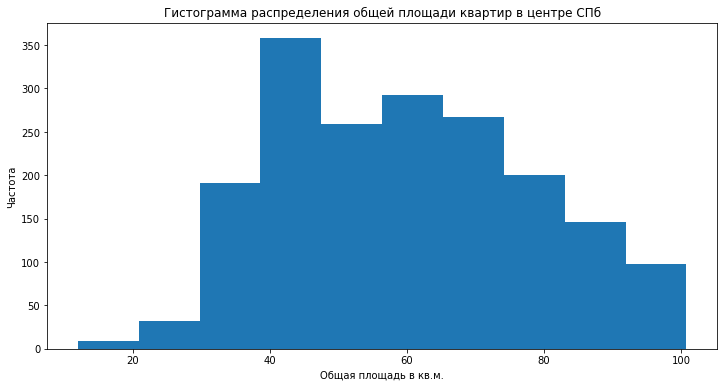

In [65]:
spb_center['total_area'].hist(grid=False)
plt.title('Гистограмма распределения общей площади квартир в центре СПб')
plt.ylabel('Частота')
plt.xlabel('Общая площадь в кв.м.')
plt.show()

Распределение общей площади квартир в центре Санкт-Петербурга нормальное.

* *Средняя площадь* квартир в центре Санкт-Петербурга: **59.72 кв.м**.
* *Медианная площадь*: **58.7 кв.м**.
* *Минимальная площадь*: **12 кв.м**.
* *Максимальная площадь*: **100.8 кв.м**.

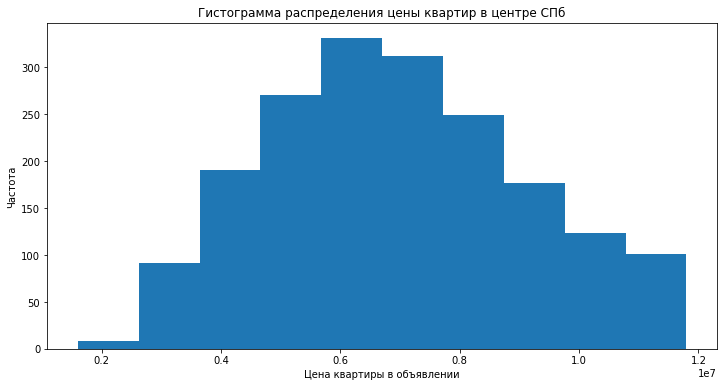

In [66]:
spb_center['last_price'].hist(grid=False)
plt.title('Гистограмма распределения цены квартир в центре СПб')
plt.ylabel('Частота')
plt.xlabel('Цена квартиры в объявлении')
plt.show()

Распределение стоимости квартир в центре Санкт-Петербурга нормальное.

* *Средняя цена* квартир в центре Санкт-Петербурга: **6,939,611 руб.**
* *Медианная цена*: **6,781,381 руб.**
* *Минимальная цена*: **1,600,000 руб.**
* *Максимальная цена*: **11,800,000 руб.**

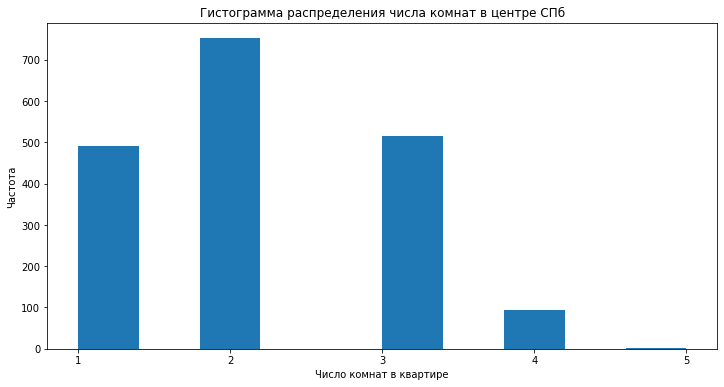

In [67]:
spb_center['rooms'].hist(grid=False).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Гистограмма распределения числа комнат в центре СПб')
plt.ylabel('Частота')
plt.xlabel('Число комнат в квартире')
plt.show()

В центре Санкт-Петербурга больше всего объвлений о продаже квартир с 2 комнатами. 1-х и 3-х комнатных квартир примерно одинаковое количество. 4-х комнатных существенно меньше, а 5-комнатные квартиры самые немногочисленные.

* *Среднее число комнат*: **~2 комнаты**.
* *Медиана*: **2 комнаты**.
* *Минимум*: **1 комната**.
* *Максимум*: **5 комнат**.

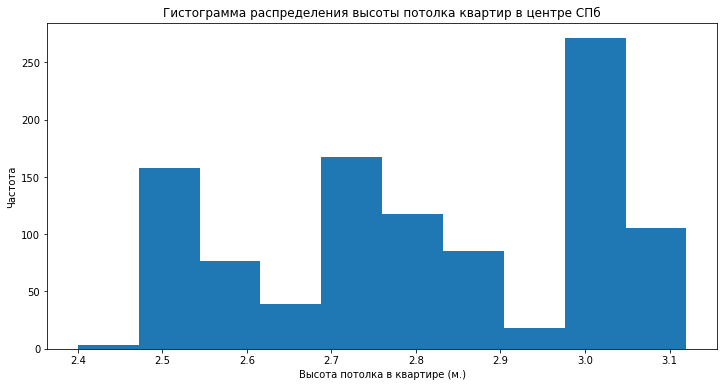

In [68]:
spb_center['ceiling_height'].hist(grid=False)
plt.title('Гистограмма распределения высоты потолка квартир в центре СПб')
plt.ylabel('Частота')
plt.xlabel('Высота потолка в квартире (м.)')
plt.show()

*Самая часто встречающаяся высота потолка среди квартир в центре*: **3 м.** Также довольно часто встречаются значения: 2.5, 2.8, 2.7 и 3.1 м.
* *Средняя высота*: **~2.8 м.**
* *Медиана*: **2.8 м.**
* *Минимум*: **2.4 м.**
* *Максимум*: **3.12 м.**

### 3.11 Влияние различных факторов на стоимость недвижимости в центре Санкт-Петербурга и по городу в целом<a name="subparagraph3_11"></a>

In [69]:
print(spb_center['last_price'].corr(spb_center['rooms']))

0.4195514004463925


* Связь между ценой и количеством комнат умеренная и положительная (**~0.42**).

In [70]:
print(spb_center['last_price'].corr(spb_center['floor']))

0.16371854576279557


In [71]:
spb_center.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median', 'count']).reset_index()

,floor_category,mean,median,count
,,last_price,last_price,last_price
0,другой,7.135207e+06,7000000.0,1305
1,первый,5.981522e+06,5685000.0,252
2,последний,6.892782e+06,6615000.0,295


* Связь между ценой и этажом слабая и положительная (**~0.164**). При более детальном рассмотрении становится очевидно, что зависимость не линейная, а значит, коэффициент корреляции Пирсона может не вполне корректно отражать силу взаимосвязи. Видно, что закономерность, выявленная на общем датасете подтвердилась: самые дешевые квартиры на первом этаже, затем идут квартиры на последнем, а самые относительно дорогие - не располагаются ни на первом, ни на последнем этаже.

In [72]:
print(spb_center['last_price'].corr(spb_center['cityCenters_nearest']))

-0.1561098217082385


* Связь между ценой и удаленностью от центра слабая и отрицательная (**-0.156**).

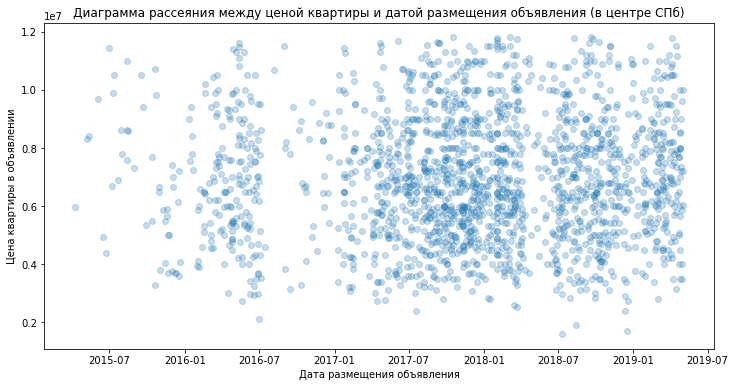

In [73]:
plt.scatter(x=spb_center['first_day_exposition'], y=spb_center['last_price'], alpha=0.25)
plt.title('Диаграмма рассеяния между ценой квартиры и датой размещения объявления (в центре СПб)')
plt.ylabel('Цена квартиры в объявлении')
plt.xlabel('Дата размещения объявления')
plt.show()

* *Связь между ценой и датой размещения нельзя назвать существенной.* На диаграмме рассеивания выше видно, что цена не менялась с течением времени и находилась в определенном диапазоне.

* Сравним полученные данные по центру с данными по Санкт-Петербургу в целом

In [74]:
print(spb['last_price'].corr(spb['rooms']))
print(spb['last_price'].corr(spb['floor']))
print(spb['last_price'].corr(spb['cityCenters_nearest']))

0.46857545688688246
0.1032132386778686
-0.29818854584774573


In [75]:
spb.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median', 'count']).reset_index()

,floor_category,mean,median,count
,,last_price,last_price,last_price
0,другой,5.565141e+06,5100000.0,9256
1,первый,4.925946e+06,4550000.0,1257
2,последний,5.349865e+06,4797000.0,1308


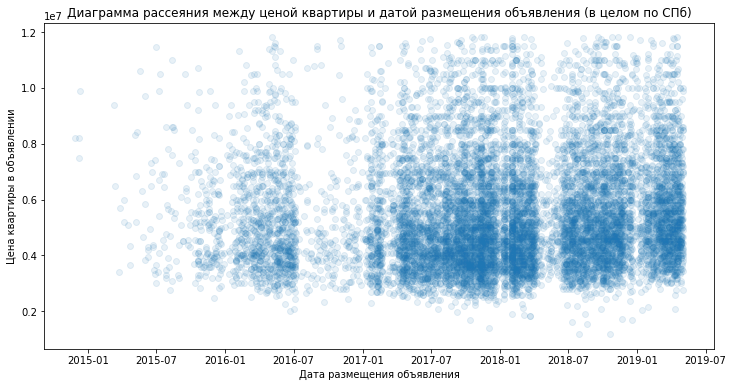

In [76]:
plt.scatter(x=spb['first_day_exposition'], y=spb['last_price'], alpha=0.1)
plt.title('Диаграмма рассеяния между ценой квартиры и датой размещения объявления (в целом по СПб)')
plt.ylabel('Цена квартиры в объявлении')
plt.xlabel('Дата размещения объявления')
plt.show()

По Санкт-Петербургу в общем были получены следующие результаты:
* Связь между количеством комнат и ценой умеренная и положительная (**0.469**). Данная корреляция чуть сильнее, чем в центре Санкт-Петербурга (**0.42**). Это может свидетельствовать о том, что, когда квартира не находится в центре, количество комнат играет несколько более важную роль. А для квартир с более выгодным местоположением этот факт может быть чуть менее важен. 
* Связь между этажом и ценой слабая и положительная (**0.103**). Данная связь несколько слабее, чем в центре города (**0.164**). Это расхождение может говорить, о том, что в центре высокое расположение квартиры может обеспечить хороший вид из окон, а на окраинах города виды могут быть менее живописными, и данный фактор не так существеннен. Общий принцип и для центра, и для города в целом - квартиры на первом этаже в среднем самые дешевые, на последнем этаже - более дорогие, а самые дорогие не располaгаются ни на первом ни на последнем этаже. Кроме того, *квартиры в центре в среднем всегда более дорогие, чем по городу в целом*. Приведем медианные значения в центре и по городу для сравнения: *первый этаж* **5,685,000 руб**. против **4,550,000 руб**., *последний этаж* **6,615,000 руб**. против **4,797,000 руб**., и *другие этажи* **7,000,000 руб**. против **5,100,000 руб**. 
* Связь между удаленностью от центра и ценой умеренная и отрицательная (**-0.298**). Данный коэффициент значительно выше в целом по городу, чем для квартир центрального сегмента (**-0.156**). Логично, что для квартир, которые уже расположены в центре, роль нескольких километров не так важна, а для квартир вне центра этот фактор больше влияет на цену.
* Связь между датой размещения и ценой положительная и существенная. На диаграмме рассеивания видно, что цены растут из года в год. В самом центре города данная тенденция не наблюдается. Можно сделать вывод, что квартиры в центре уже изначально торговались с некоторой премией к рынку в силу своего благоприятного расположения, и соответственно рост цен с течением времени не был так ощутим. А квартиры в среднем по городу существенно подорожали, так как, в числе прочих факторов, они изначально являлись сравнительно более доступными и имели эффект "низкой базы", что способствовало росту цен.

[Вернуться к оглавлению](#introduction)

## 4. Общий вывод<a name="paragraph4"></a>

В данном проекте было изучено влияние различных факторов на стоимость жилья в Санкт-Петербурге и ближайших населенных пунктах. Подведем итоги анализа и выделим ключевые результаты:

* *Связь между стоимостью и общей площадью квартиры* можно охарактеризовать, как положительную и наиболее сильную из рассмотренных факторов.
* *Связь между стоимостью и количеством комнат* также положительна, однако она значительно слабее, чем связь между стоимостью и общей площадью.
* *Связь между стоимостью и удаленностью от центра* умеренная и отрицательная. Чем дальше квартира находится от центра населенного пункта, тем она дешевле.
* Квартиры *на первом этаже* в среднем стоят дешевле квартир на *последнем этаже*. Дороже всего в среднем оцениваются квартиры, не находящиеся *ни на первом, ни на последнем этаже*.
* В *выходные дни* размещается примерно в два раза меньше объявлений, чем в *будние дни*. 
* В *апреле* публикуются объявления с наивысшей ценой, а в *июне* - с наименьшей. Также небольшое увеличение цены наблюдается в *ноябре*. 
* В *мае* публикуют наименьшее количество объявлений в году, а в *феврале* - больше всего. В *декабре и январе* количество размещенных объявлений также значительно ниже, чем в другие месяцы, но несколько выше, чем в мае.
* *Популярность сервиса* по размещению объявлений быстро росла на протяжении 2014-2018 гг. и достигла пика в 2018 году. В 2019, произошел резкий спад количества объявлений почти в 3 раза. 
* Из *топ-10 населенных пунктов* по количеству размещенных объявлений самым дорогим является Санкт-Петербург (105527.93 руб. / 1 кв.м.).
* *Самые доступные квартиры* - в Выборге (57738.77 руб / 1 кв.м.), почти в 2 раза дешевле, чем в Санкт-Петербурге.
* *Граница центра Санкт-Петербурга* проходит в радиусе 8 километров включительно.
* Цены в целом по Санкт-Петербургу за исследуемый период увеличились значительно сильнее, чем в центре города.

[Вернуться к оглавлению](#introduction)